# Stock Analysis
This is a project that I wanted to do to get a little more familiar with pandas, matplotlib, and seaborn libraries in Python. I picked a few stocks that I am interested in and did some analysis on these stocks. A few things I wanted to look at are:
- Visualize some basic metrics for each stock
- Correlation of returns between each stock
- Risk analysis of each stock
- Sentiment analysis

In [2]:
# For division
from __future__ import division

# General necessary libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# With DataReader we can pull a whole bunch of stock information from yahoo
from pandas_datareader import DataReader

# For easier dates
from datetime import datetime


C:\Users\Luca Imbrogno\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Stock Selection
Here we will choose which stocks we want to analyze. Since I recently completed an web development internship at a company in the social media influencer space, I think it would be interesting to look at a few popular social media companies! 
- Facebook
- Snapchat
- Twitter

In [3]:
stocks = ['FB', 'SNAP', 'TWTR']

# retrieve last year of data for each stock from google finance
end_date = datetime.now()
start_date = datetime(end_date.year-2, end_date.month, end_date.month)

stock_data = {}
for stock in stocks:
    stock_data[stock] = DataReader(stock,'yahoo',start_date,end_date)

In [4]:
# Here we can view some stats for Facebook stock
stock_data['FB'].head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-04-04,155.559998,150.509995,152.029999,155.100006,49885600,155.100006
2018-04-05,161.570007,156.649994,161.559998,159.339996,41449600,159.339996
2018-04-06,161.419998,156.809998,157.729996,157.199997,41644800,157.199997
2018-04-09,160.529999,156.039993,157.820007,157.929993,34915200,157.929993
2018-04-10,165.979996,157.009995,157.929993,165.039993,57889300,165.039993


In [5]:
stock_data['FB'].describe()

,High,Low,Open,Close,Volume,Adj Close
count,519.000000,519.000000,519.000000,519.000000,5.190000e+02,519.000000
mean,180.545569,176.246166,178.380193,178.505009,2.052410e+07,178.505009
std,20.804880,21.337013,21.120737,21.171182,1.245330e+07,21.171182
min,129.740005,123.019997,123.099998,124.059998,6.046300e+06,124.059998
25%,166.230003,161.900002,163.805000,164.490005,1.291695e+07,164.490005
50%,182.100006,178.360001,180.419998,180.729996,1.759200e+07,180.729996
75%,195.404999,191.740005,194.014999,193.224998,2.407355e+07,193.224998
max,224.199997,221.279999,222.570007,223.229996,1.698037e+08,223.229996


# Visualizing Stock Data
First let's take a look at the daily closing price of each stock over the past two years

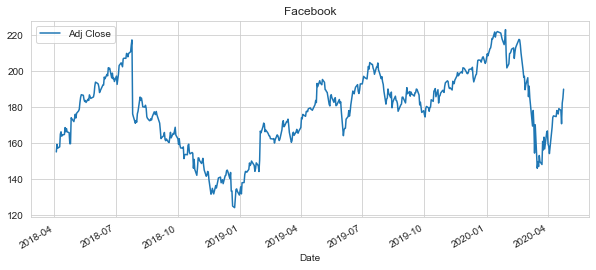

In [6]:
# Facebook
stock_data['FB']['Adj Close'].plot(title='Facebook', legend=True, figsize=(10,4))

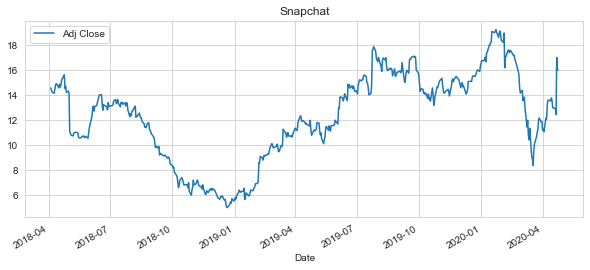

In [7]:
# Snapchat
stock_data['SNAP']['Adj Close'].plot(title='Snapchat', legend=True, figsize=(10,4))

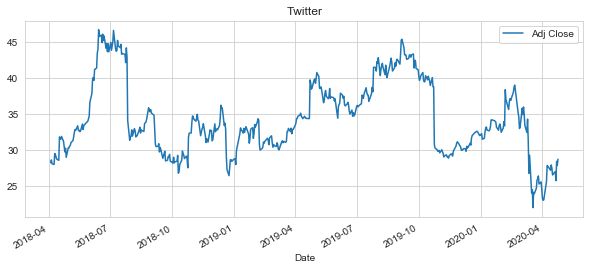

In [8]:
# Twitter
stock_data['TWTR']['Adj Close'].plot(title='Twitter',legend=True, figsize=(10,4))

Obviously this is just a standard stock chart that you find with a simple google search so let's get a little more in depth and look at the daily change in price over the last two years for Facebook.

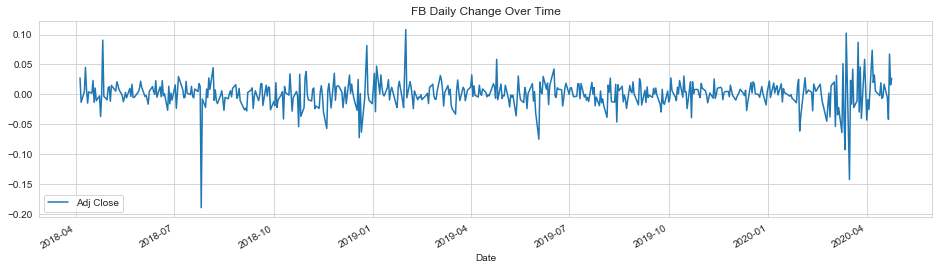

In [9]:
# Use pct_change() function to convert closing price to percentage change in closing price
stock_data['FB']['Adj Close'].pct_change().plot(title='FB Daily Change Over Time',legend=True, figsize=(16,4))


As we can see from observing the figure above, there is a large negative spike around time 2018-07 - 2018-08. A simple google search filtered to that date reveals that Facebook had just announced underwhelming quarterly results and growth projections. Additionally, there were lots of questions about the future of the company after the Cambridge Analytica scandal. !!!LINK TO SENTIMENT ANALYSIS PROJECt?!!!
![title](facebook_search.png)

# Risk Analysis
In investing, risk is commonly defined as the measure of any deviation from an expected outcome. There are many ways to measure the risk of an investment. Two metrics I'm going to focus on in this analysis are:
- Standard deviation: The most obvious metric given the definition above. Measures the dispersion around the mean.
- Beta: A measure of a stocks volatility in relation to the overall market. The market. in theory, has a beta of 1.0


The previous figure displayed above shows the daily return of Facebook stock over time. Continuing in that direction, we can use our stocks array to calculate the daily percentage change for all three stocks and then calculate the standard deviation from there.

In [10]:
stocks_close = DataReader(stocks,'yahoo',start_date,end_date)['Adj Close']
stocks_returns = stocks_close.pct_change()

stocks_returns.std()

Symbols
FB      0.023942
SNAP    0.040414
TWTR    0.033787
dtype: float64

From this metric, Snapchat has the lowest risk level. However it may be useful to use more than two years data to compare the risk of these stocks. Another way to look at this type of risk is with a histogram.

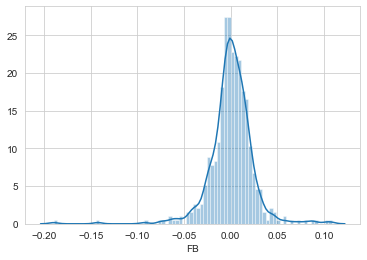

In [11]:
sns.distplot(stocks_returns['FB'].dropna(),bins=80)

By observing the different quantiles within the normal distribution above, we can determine our confidence level for level for different levels of returns

In [16]:
stocks_returns['FB'].quantile(0.05)

0.031676669775797556

# Comparison Analysis
Let's do some comparisons between these stocks. I like to use scatter plot matrices because it makes it really easy to see trends visually. Initially, we will look at the daily returns of each stock and how they compare with eachother.

First We have to combine the daily returns of these three stocks into a single data structure.


In [62]:
# First combine daily closing prices of each stock into one data frame
stocks_close = DataReader(stocks,'yahoo',start_date,end_date)['Close']

stocks_close.head()

Symbols,FB,SNAP,TWTR
Date,,,
2018-04-04,155.100006,14.59,28.250000
2018-04-05,159.339996,14.39,28.639999
2018-04-06,157.199997,14.25,28.100000
2018-04-09,157.929993,14.15,28.010000
2018-04-10,165.039993,14.48,29.530001


In [63]:
# Convert to daily percentage gain/loss
stocks_returns = stocks_close.pct_change()

# Let's take a look at our data
stocks_returns.head()

Symbols,FB,SNAP,TWTR
Date,,,
2018-04-04,NaN,NaN,NaN
2018-04-05,0.027337,-0.013708,0.013805
2018-04-06,-0.013430,-0.009729,-0.018855
2018-04-09,0.004644,-0.007018,-0.003203
2018-04-10,0.045020,0.023322,0.054266


C:\Users\Luca Imbrogno\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


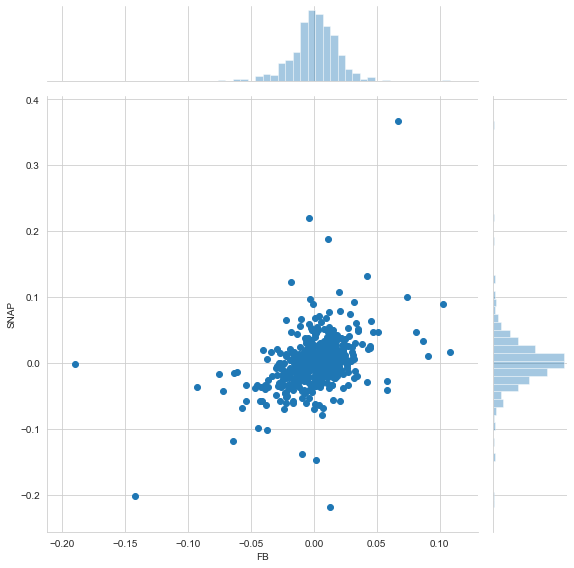

In [64]:
# Let's first just look at the scatter plot of daily returns between facebook adn snapchat
sns.jointplot('FB','SNAP',stocks_returns, kind='scatter',size=8)

C:\Users\Luca Imbrogno\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


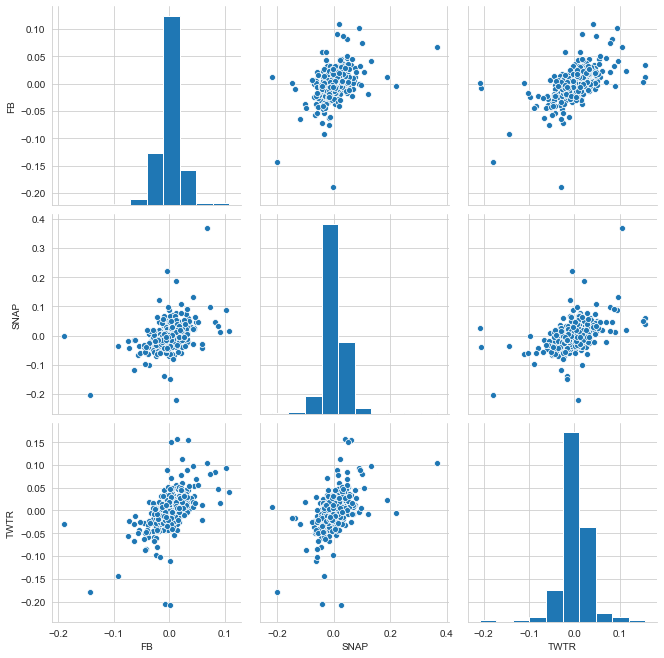

In [38]:
# seaborn and Pandas allow us to build a full scatter plot matrix super easily!
sns.pairplot(stocks_returns.dropna(),size=3)

The histogram on the diagonal represents the distribution of daily percentage return for each stock. Observing the figure above, it looks like the highest correlation exists between Facebook and Twitter. To further investigate this we can try a slightly different visual representation.By using Seaborn's heatmap function we can see a numercial value representing the strength of the correlation.

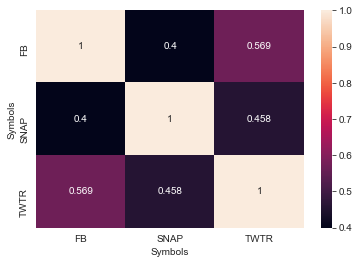

In [65]:
sns.heatmap(stocks_returns.corr(),annot=True,fmt=".3g")